In [1]:
import numpy as np
from spec_id import Analyze_Stack_avgage,Likelihood_contours, Make_model_list,Best_fit_model,\
    Analyze_Stack_avgage_cont_feat,Highest_likelihood_model,Galaxy_ids,Stack
import matplotlib.pyplot as plt
from vtl.Readfile import Readfile
from glob import glob
from astropy.io import fits, ascii
from astropy.table import Table
from scipy.interpolate import interp1d, interp2d
import os
import cPickle
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [3]:
gids=Galaxy_ids('masslist_mar22.dat')
metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
M,A=np.meshgrid(metal,age)

0.014 3.9 0
Best fit model is 3.9 Gyr and 0.014 Z


[ 149.45077763  832.16910271]

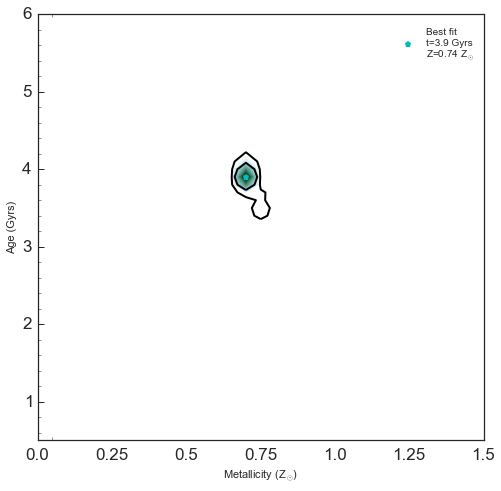

0.024 1.6 0
Best fit model is 2.3 Gyr and 0.016 Z


[   7.22941807  122.90010714]

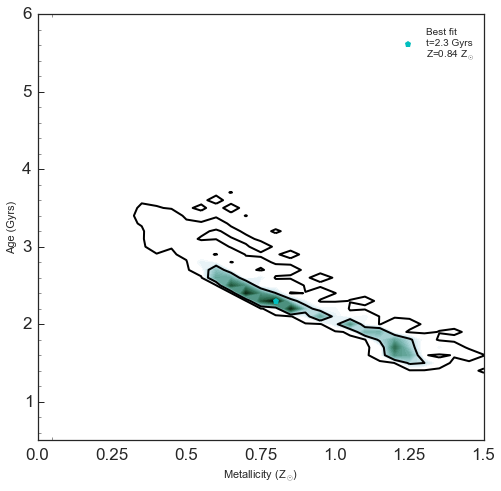

In [13]:
% matplotlib inline

Best_fit_model('chidat/com_mar28_fit_chidata.fits',metal,age,tau)
Pr, bfage, bfmetal= Analyze_Stack_avgage('chidat/com_mar28_fit_chidata.fits',np.array(tau),metal,age)
onesig,twosig=Likelihood_contours(age,metal,Pr)
levels=np.array([twosig,onesig])
print levels
# levels=np.array([42.20321075, 260.48003195])

plt.figure(figsize=[8,8])
plt.contour(M,A,Pr,levels,colors='k',linewidths=2)
plt.contourf(M,A,Pr,40,cmap=colmap)
plt.plot(bfmetal,bfage,'cp',label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfage,np.round(bfmetal/0.019,2)))
plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
plt.tick_params(axis='both', which='major', labelsize=17)
plt.gcf().subplots_adjust(bottom=0.16)
plt.minorticks_on()
plt.xlabel('Metallicity (Z$_\odot$)')
plt.ylabel('Age (Gyrs)')
plt.legend()
plt.show()
# plt.savefig('../important_plots/com_mar23_LH.png')
plt.close()

#########
Best_fit_model('chidat/ext_mar28_fit_chidata.fits',metal,age,tau)
Pr, bfage, bfmetal= Analyze_Stack_avgage('chidat/ext_mar28_fit_chidata.fits',np.array(tau),metal,age)
onesig,twosig=Likelihood_contours(age,metal,Pr)
levels=np.array([twosig,onesig])
print levels
# levels=np.array([42.20321075, 260.48003195])

plt.figure(figsize=[8,8])
plt.contour(M,A,Pr,levels,colors='k',linewidths=2)
plt.contourf(M,A,Pr,40,cmap=colmap)
plt.plot(bfmetal,bfage,'cp',label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfage,np.round(bfmetal/0.019,2)))
plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
plt.tick_params(axis='both', which='major', labelsize=17)
plt.gcf().subplots_adjust(bottom=0.16)
plt.minorticks_on()
plt.xlabel('Metallicity (Z$_\odot$)')
plt.ylabel('Age (Gyrs)')
plt.legend()
plt.show()
# plt.savefig('../important_plots/ext_mar23_LH.png')
plt.close()

Best fit model is 3.3 Gyr and 0.012 Z
[  13.11380873  174.85078304]

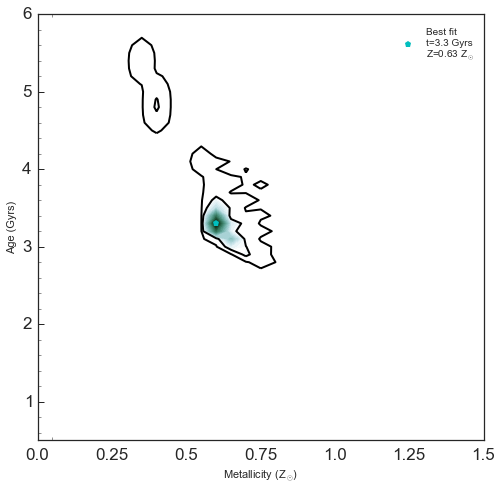

Best fit model is 5.4 Gyr and 0.008 Z
[  12.20575402  441.44143707]

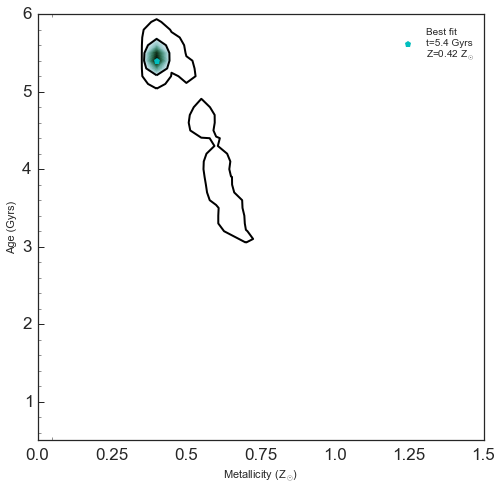

In [14]:
Pr, bfage, bfmetal= Analyze_Stack_avgage('chidat/gt10.93_mar28_fit_chidata.fits',np.array(tau),metal,age)
onesig,twosig=Likelihood_contours(age,metal,Pr)
levels=np.array([twosig,onesig])
print levels
# levels=np.array([42.20321075, 260.48003195])

plt.figure(figsize=[8,8])
plt.contour(M,A,Pr,levels,colors='k',linewidths=2)
plt.contourf(M,A,Pr,40,cmap=colmap)
plt.plot(bfmetal,bfage,'cp',label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfage,np.round(bfmetal/0.019,2)))
plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
plt.tick_params(axis='both', which='major', labelsize=17)
plt.gcf().subplots_adjust(bottom=0.16)
plt.minorticks_on()
plt.xlabel('Metallicity (Z$_\odot$)')
plt.ylabel('Age (Gyrs)')
plt.legend()
plt.show()
# plt.savefig('../important_plots/gt10.93_mar23_LH.png')
plt.close()

#########

Pr, bfage, bfmetal= Analyze_Stack_avgage('chidat/lt10.93_mar28_fit_chidata.fits',np.array(tau),metal,age)
onesig,twosig=Likelihood_contours(age,metal,Pr)
levels=np.array([twosig,onesig])
print levels
# levels=np.array([42.20321075, 260.48003195])

plt.figure(figsize=[8,8])
plt.contour(M,A,Pr,levels,colors='k',linewidths=2)
plt.contourf(M,A,Pr,40,cmap=colmap)
plt.plot(bfmetal,bfage,'cp',label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfage,np.round(bfmetal/0.019,2)))
plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
plt.tick_params(axis='both', which='major', labelsize=17)
plt.gcf().subplots_adjust(bottom=0.16)
plt.minorticks_on()
plt.xlabel('Metallicity (Z$_\odot$)')
plt.ylabel('Age (Gyrs)')
plt.legend()
plt.show()
# plt.savefig('../important_plots/lt10.93_mar23_LH.png')
plt.close()

Best fit model is 3.3 Gyr and 0.014 Z
(56, 29)
[  88.89602701  472.9268637 ]

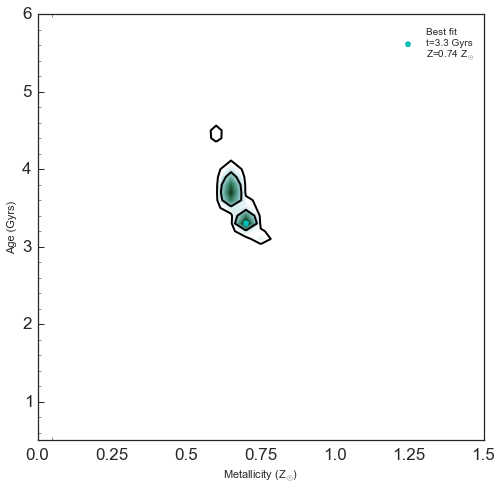

Best fit model is 2.3 Gyr and 0.016 Z
[  5.79726302  63.76989321]

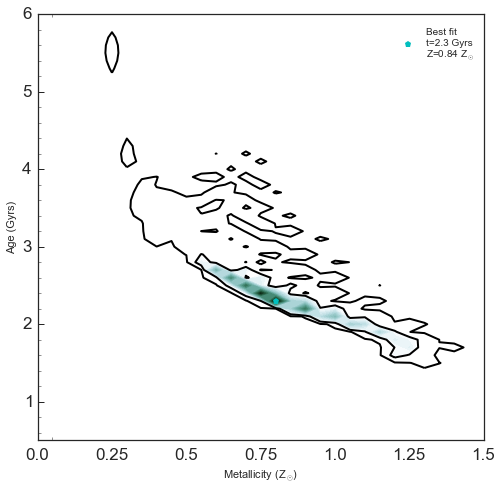

In [15]:
% matplotlib inline

Pr, bfage, bfmetal= Analyze_Stack_avgage_cont_feat('chidat/com_cont_mar28_fit_chidata.fits','chidat/com_feat_mar28_fit_chidata.fits',
                    np.array(tau),metal,age)
print Pr.shape
onesig,twosig=Likelihood_contours(age,metal,Pr)
levels=np.array([twosig,onesig])
print levels
# levels=np.array([42.20321075, 260.48003195])

plt.figure(figsize=[8,8])
plt.contour(M,A,Pr,levels,colors='k',linewidths=2)
plt.contourf(M,A,Pr,40,cmap=colmap)
plt.plot(bfmetal,bfage,'cp',label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfage,np.round(bfmetal/0.019,2)))
plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
plt.tick_params(axis='both', which='major', labelsize=17)
plt.gcf().subplots_adjust(bottom=0.16)
plt.minorticks_on()
plt.xlabel('Metallicity (Z$_\odot$)')
plt.ylabel('Age (Gyrs)')
plt.legend()
plt.show()
# plt.savefig('../important_plots/com_mar23_cf_LH.png')
plt.close()

#########

Pr, bfage, bfmetal= Analyze_Stack_avgage_cont_feat('chidat/ext_cont_mar28_fit_chidata.fits','chidat/ext_feat_mar28_fit_chidata.fits',
                    np.array(tau),metal,age)
onesig,twosig=Likelihood_contours(age,metal,Pr)
levels=np.array([twosig,onesig])
print levels
# levels=np.array([42.20321075, 260.48003195])

plt.figure(figsize=[8,8])
plt.contour(M,A,Pr,levels,colors='k',linewidths=2)
plt.contourf(M,A,Pr,40,cmap=colmap)
plt.plot(bfmetal,bfage,'cp',label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfage,np.round(bfmetal/0.019,2)))
plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
plt.tick_params(axis='both', which='major', labelsize=17)
plt.gcf().subplots_adjust(bottom=0.16)
plt.minorticks_on()
plt.xlabel('Metallicity (Z$_\odot$)')
plt.ylabel('Age (Gyrs)')
plt.legend()
plt.show()
# # plt.savefig('../important_plots/ext_mar23_cf_LH.png')
plt.close()

Best fit model is 3.1 Gyr and 0.012 Z
[  17.48718998  211.59499871]

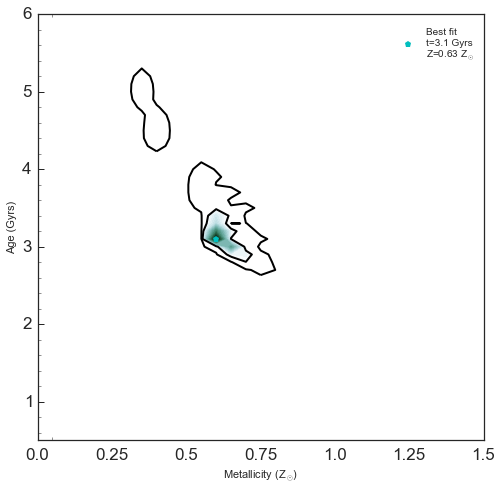

Best fit model is 3.5 Gyr and 0.012 Z
[  13.08000235  122.26958721]

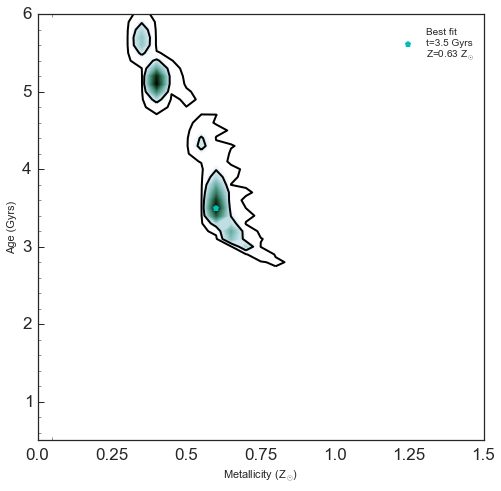

In [16]:
% matplotlib inline

Pr, bfage, bfmetal= Analyze_Stack_avgage_cont_feat('chidat/gt10.93_cont_mar28_fit_chidata.fits','chidat/gt10.93_feat_mar28_fit_chidata.fits',
                    np.array(tau),metal,age)
onesig,twosig=Likelihood_contours(age,metal,Pr)
levels=np.array([twosig,onesig])
print levels
# levels=np.array([42.20321075, 260.48003195])

plt.figure(figsize=[8,8])
plt.contour(M,A,Pr,levels,colors='k',linewidths=2)
plt.contourf(M,A,Pr,40,cmap=colmap)
plt.plot(bfmetal,bfage,'cp',label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfage,np.round(bfmetal/0.019,2)))
plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
plt.tick_params(axis='both', which='major', labelsize=17)
plt.gcf().subplots_adjust(bottom=0.16)
plt.minorticks_on()
plt.xlabel('Metallicity (Z$_\odot$)')
plt.ylabel('Age (Gyrs)')
plt.legend()
plt.show()
# plt.savefig('../important_plots/gt10.93_mar23_cf_LH.png')
plt.close()

#########

Pr, bfage, bfmetal= Analyze_Stack_avgage_cont_feat('chidat/lt10.93_cont_mar28_fit_chidata.fits','chidat/lt10.93_feat_mar28_fit_chidata.fits',
                    np.array(tau),metal,age)
onesig,twosig=Likelihood_contours(age,metal,Pr)
levels=np.array([twosig,onesig])
print levels
# levels=np.array([42.20321075, 260.48003195])

plt.figure(figsize=[8,8])
plt.contour(M,A,Pr,levels,colors='k',linewidths=2)
plt.contourf(M,A,Pr,40,cmap=colmap)
plt.plot(bfmetal,bfage,'cp',label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfage,np.round(bfmetal/0.019,2)))
plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
plt.tick_params(axis='both', which='major', labelsize=17)
plt.gcf().subplots_adjust(bottom=0.16)
plt.minorticks_on()
plt.xlabel('Metallicity (Z$_\odot$)')
plt.ylabel('Age (Gyrs)')
plt.legend()
plt.show()
# plt.savefig('../important_plots/lt10.93_mar23_cf_LH.png')
plt.close()

In [26]:
cS=Stack(gids.speclist_C,gids.rshift_C,np.arange(3250,5350,10))
cS.Stack_normwmean()
cS.Highest_likelihood_model_mlist(gids.ids_C,0.02,3.6,tau)
cS.Stack_normwmean_model(cS.mlist)

dS=Stack(gids.speclist_D,gids.rshift_D,np.arange(3250,5350,10))
dS.Stack_normwmean()
dS.Highest_likelihood_model_mlist(gids.ids_D,0.019,3.5,tau)
dS.Stack_normwmean_model(dS.mlist)

lzS=Stack(gids.speclist_lz,gids.rshift_lz,np.arange(3250,5350,10))
lzS.Stack_normwmean()
lzS.Highest_likelihood_model_mlist(gids.ids_lz,0.021,4.0,tau)
lzS.Stack_normwmean_model(lzS.mlist)

mzS=Stack(gids.speclist_mz,gids.rshift_mz,np.arange(3250,5350,10))
mzS.Stack_normwmean()
mzS.Highest_likelihood_model_mlist(gids.ids_mz,0.013,3.3,tau)
mzS.Stack_normwmean_model(mzS.mlist)

hzS=Stack(gids.speclist_hz,gids.rshift_hz,np.arange(3250,5350,10))
hzS.Stack_normwmean()
hzS.Highest_likelihood_model_mlist(gids.ids_hz,0.026,3.1,tau)
hzS.Stack_normwmean_model(hzS.mlist)

[0.02, 3.6, 8.6]
[0.019, 3.5, 8.78]


[0.021, 4.0, 8.78]


[0.013, 3.3, 8.6]


[0.026, 3.1, 8.6]

In [5]:
def Plot_stack(wv,fl,er,mwv,mfl,bfm,bfa,use_win=False,window=[],save_plot=False,plot_name=''):
    plt.figure(figsize=[15,8])
    plt.errorbar(wv,fl,er,fmt='o')
    plt.plot(mwv,mfl,'r',label='Z=%s Z$_\odot$,t=%s' % (np.round(bfm/0.019,2),bfa))
    plt.axvspan(3800, 3850, color='r', alpha=.1)
    plt.axvspan(3910, 3980, color='k', alpha=.1)
    plt.axvspan(3980, 4030, color='k', alpha=.1)
    plt.axvspan(4080, 4120, color='k', alpha=.1)
    plt.axvspan(4250, 4380, color='k', alpha=.1)
    plt.axvspan(4510, 4570, color='r', alpha=.1)
    plt.axvspan(4810, 4910, color='k', alpha=.1)
    plt.axvspan(4970, 5050, color='r', alpha=.1)
    plt.axvspan(5110, 5280, color='k', alpha=.1)
    if use_win == True:
        plt.axis(window)
    plt.ylabel('F$_\lambda$ (10$^{-18}$ erg/s/cm$^2$/$\AA$)',size=20)
    plt.xlabel('Restframe Wavelength ($\AA$)',size=20)
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.gcf().subplots_adjust(bottom=0.235)
    plt.legend(loc=4,fontsize=15)
    plt.minorticks_on()
    if save_plot == True:
        plt.savefig(plot_name)
    else:
        plt.show()
    plt.close()

In [ ]:
%matplotlib inline

Plot_stack(cS.wv,cS.fl,cS.er,cS.mwv,cS.mfl,0.02,3.6,use_win=True,window=[3500,5400,0,0.008],save_plot=True,plot_name='../important_plots/stack_C_bf.png')
Plot_stack(dS.wv,dS.fl,dS.er,dS.mwv,dS.mfl,0.019,3.5,use_win=True,window=[3500,5400,0,0.007],save_plot=True,plot_name='../important_plots/stack_D_bf.png')
Plot_stack(lzS.wv,lzS.fl,lzS.er,lzS.mwv,lzS.mfl,0.021,4.0,use_win=True,window=[3900,5400,0,0.008],save_plot=True,plot_name='../important_plots/stack_lz_bf.png')
Plot_stack(mzS.wv,mzS.fl,mzS.er,mzS.mwv,mzS.mfl,0.013,3.3,use_win=True,window=[3600,5100,0,0.008],save_plot=True,plot_name='../important_plots/stack_mz_bf.png')
Plot_stack(hzS.wv,hzS.fl,hzS.er,hzS.mwv,hzS.mfl,0.026,3.1,use_win=True,window=[3300,4800,0,0.008],save_plot=True,plot_name='../important_plots/stack_hz_bf.png')

[0.02, 3.6, 8.6]
[0.02, 3.6, 8.6]

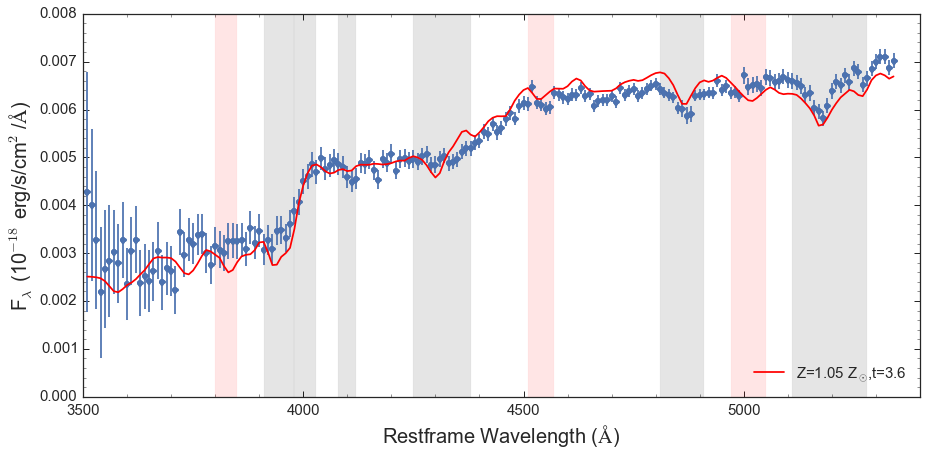

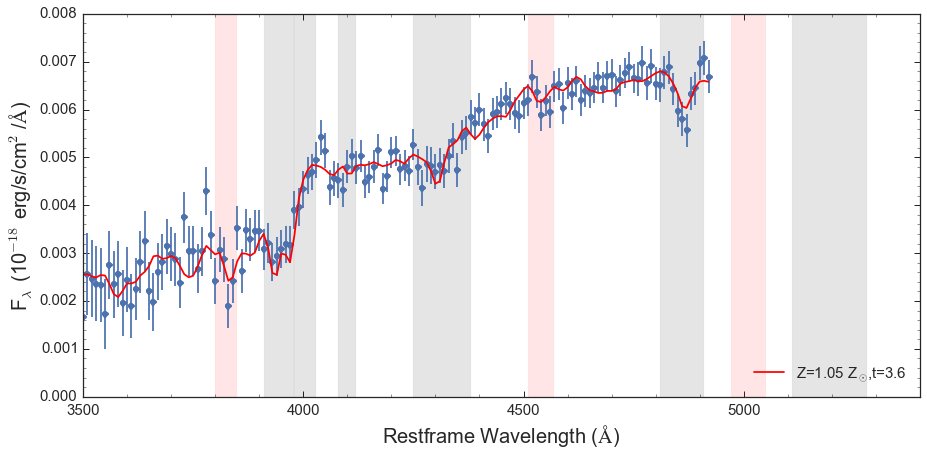

In [15]:
%matplotlib inline

IDc1=[U for U in range(len(gids.rshift_C)) if gids.rshift_C[U] < 1.253]
IDc2=[U for U in range(len(gids.rshift_C)) if 1.253 < gids.rshift_C[U]]

cS1=Stack(gids.speclist_C[IDc1],gids.rshift_C[IDc1],np.arange(3250,5350,10))
cS1.Stack_normwmean()
cS1.Highest_likelihood_model_mlist(gids.ids_C[IDc1],0.02,3.6,tau)
cS1.Stack_normwmean_model(cS1.mlist)

cS2=Stack(gids.speclist_C[IDc2],gids.rshift_C[IDc2],np.arange(3250,5350,10))
cS2.Stack_normwmean()
cS2.Highest_likelihood_model_mlist(gids.ids_C[IDc2],0.02,3.6,tau)
cS2.Stack_normwmean_model(cS2.mlist)

# plt.figure(figsize=[8,8])
# plt.hist(gids.rshift_C[IDc1])
# plt.hist(gids.rshift_C[IDc2])
# plt.show()
# plt.close()

Plot_stack(cS1.wv,cS1.fl,cS1.er,cS1.mwv,cS1.mfl,0.02,3.6,use_win=True,window=[3500,5400,0,0.008],save_plot=False,plot_name='../important_plots/stack_C_bf.png')
Plot_stack(cS2.wv,cS2.fl,cS2.er,cS2.mwv,cS2.mfl,0.02,3.6,use_win=True,window=[3500,5400,0,0.008],save_plot=False,plot_name='../important_plots/stack_C_bf.png')